**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.impute

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

**IMPORTING THE DATASET**

In [ ]:
from google.colab import files 
uploaded=files.upload()

Saving diabetes ID.xlsx to diabetes ID.xlsx


In [ ]:
#reading the dataset
df = pd.read_excel('diabetes ID.xlsx')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ID
0,6,148,72.0,35,0,33.6,0.627,50,1,1
1,1,85,66.0,29,0,26.6,0.351,31,0,2
2,8,183,NaN,0,0,23.3,0.672,32,1,3
3,1,89,66.0,23,94,28.1,0.167,21,0,4
4,0,137,40.0,35,168,43.1,2.288,33,1,5
...,...,...,...,...,...,...,...,...,...,...
4763,2,75,64.0,24,55,29.7,0.370,33,0,4764
4764,8,179,72.0,42,130,32.7,0.719,36,1,4765
4765,6,85,78.0,0,0,31.2,0.382,42,0,4766
4766,0,129,110.0,46,130,56.0,0.319,26,1,4767


In [ ]:
#no.of rows and columns of the dataset
df.shape

(4768, 10)

**CHECKING FOR MISSING DATA**

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               2
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
ID                          0
dtype: int64

In [ ]:
#displaying missing values
df[df['BloodPressure'].isnull()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ID
2,8,183,NaN,0,0,23.3,0.672,32,1,3
14,5,166,NaN,19,175,25.8,0.587,51,1,15


**HANDLING THE MISSING DATA**

In [ ]:
#replacing missing values with '0'
newdf0=df.fillna("0")
newdf0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ID
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,2
2,8,183,0,0,0,23.3,0.672,32,1,3
3,1,89,66,23,94,28.1,0.167,21,0,4
4,0,137,40,35,168,43.1,2.288,33,1,5
...,...,...,...,...,...,...,...,...,...,...
4763,2,75,64,24,55,29.7,0.370,33,0,4764
4764,8,179,72,42,130,32.7,0.719,36,1,4765
4765,6,85,78,0,0,31.2,0.382,42,0,4766
4766,0,129,110,46,130,56.0,0.319,26,1,4767


In [ ]:
##replacing missing values with 'forwardfill'
newdf1=df.fillna(method='ffill')
newdf1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ID
0,6,148,72.0,35,0,33.6,0.627,50,1,1
1,1,85,66.0,29,0,26.6,0.351,31,0,2
2,8,183,66.0,0,0,23.3,0.672,32,1,3
3,1,89,66.0,23,94,28.1,0.167,21,0,4
4,0,137,40.0,35,168,43.1,2.288,33,1,5
...,...,...,...,...,...,...,...,...,...,...
4763,2,75,64.0,24,55,29.7,0.370,33,0,4764
4764,8,179,72.0,42,130,32.7,0.719,36,1,4765
4765,6,85,78.0,0,0,31.2,0.382,42,0,4766
4766,0,129,110.0,46,130,56.0,0.319,26,1,4767


In [ ]:
#replacing missing values with 'backwardfill'
newdf2=df.fillna(method='bfill')
newdf2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ID
0,6,148,72.0,35,0,33.6,0.627,50,1,1
1,1,85,66.0,29,0,26.6,0.351,31,0,2
2,8,183,66.0,0,0,23.3,0.672,32,1,3
3,1,89,66.0,23,94,28.1,0.167,21,0,4
4,0,137,40.0,35,168,43.1,2.288,33,1,5
...,...,...,...,...,...,...,...,...,...,...
4763,2,75,64.0,24,55,29.7,0.370,33,0,4764
4764,8,179,72.0,42,130,32.7,0.719,36,1,4765
4765,6,85,78.0,0,0,31.2,0.382,42,0,4766
4766,0,129,110.0,46,130,56.0,0.319,26,1,4767


In [ ]:
#describing the data
newdf2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ID
count,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000
mean,3.726300,121.136116,69.124371,20.770554,80.009648,32.122945,0.469658,33.114723,0.343121,2384.500000
std,3.316081,32.046650,19.237288,15.714685,111.028734,7.951242,0.318260,11.779869,0.474801,1376.547372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,1.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000,1192.750000
50%,3.000000,117.000000,72.000000,23.000000,37.500000,32.250000,0.375500,29.000000,0.000000,2384.500000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.700000,0.624000,40.000000,1.000000,3576.250000
max,17.000000,199.000000,122.000000,60.000000,744.000000,64.400000,2.329000,81.000000,1.000000,4768.000000


In [ ]:
#displaying the new data after handling missing values
newdf2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ID
0,6,148,72.0,35,0,33.6,0.627,50,1,1
1,1,85,66.0,29,0,26.6,0.351,31,0,2
2,8,183,66.0,0,0,23.3,0.672,32,1,3
3,1,89,66.0,23,94,28.1,0.167,21,0,4
4,0,137,40.0,35,168,43.1,2.288,33,1,5


In [ ]:
#checking for missing data after handling missing values
newdf2.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
ID                          0
dtype: int64

In [ ]:
newdf2[newdf2['BloodPressure'].isnull()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ID


CHECKING FOR DUPLICATE RECORDS

In [ ]:
newdf2.duplicated().sum()

0

REMOVING OUTLIERS

In [ ]:
print(newdf2['Pregnancies'].quantile(0.50))
print(newdf2['Pregnancies'].quantile(0.95))

newdf2['Pregnancies']=np.where(newdf2['Pregnancies']>6,3,newdf2['Pregnancies'])
newdf2.describe()

3.0
10.0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ID
count,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000
mean,2.488255,121.136116,69.124371,20.770554,80.009648,32.122945,0.469658,33.114723,0.343121,2384.500000
std,1.703988,32.046650,19.237288,15.714685,111.028734,7.951242,0.318260,11.779869,0.474801,1376.547372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,1.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000,1192.750000
50%,3.000000,117.000000,72.000000,23.000000,37.500000,32.250000,0.375500,29.000000,0.000000,2384.500000
75%,3.000000,141.000000,80.000000,32.000000,130.000000,36.700000,0.624000,40.000000,1.000000,3576.250000
max,6.000000,199.000000,122.000000,60.000000,744.000000,64.400000,2.329000,81.000000,1.000000,4768.000000


In [ ]:
#displaying data after removing outliers
newdf2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ID
0,6,148,72.0,35,0,33.6,0.627,50,1,1
1,1,85,66.0,29,0,26.6,0.351,31,0,2
2,3,183,66.0,0,0,23.3,0.672,32,1,3
3,1,89,66.0,23,94,28.1,0.167,21,0,4
4,0,137,40.0,35,168,43.1,2.288,33,1,5
...,...,...,...,...,...,...,...,...,...,...
4763,2,75,64.0,24,55,29.7,0.370,33,0,4764
4764,3,179,72.0,42,130,32.7,0.719,36,1,4765
4765,6,85,78.0,0,0,31.2,0.382,42,0,4766
4766,0,129,110.0,46,130,56.0,0.319,26,1,4767


In [ ]:
newdf2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ID
count,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000
mean,2.488255,121.136116,69.124371,20.770554,80.009648,32.122945,0.469658,33.114723,0.343121,2384.500000
std,1.703988,32.046650,19.237288,15.714685,111.028734,7.951242,0.318260,11.779869,0.474801,1376.547372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,1.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000,1192.750000
50%,3.000000,117.000000,72.000000,23.000000,37.500000,32.250000,0.375500,29.000000,0.000000,2384.500000
75%,3.000000,141.000000,80.000000,32.000000,130.000000,36.700000,0.624000,40.000000,1.000000,3576.250000
max,6.000000,199.000000,122.000000,60.000000,744.000000,64.400000,2.329000,81.000000,1.000000,4768.000000


In [ ]:
#displaying a specific row in the dataset
display(newdf2.iloc[1675])

Pregnancies                    5.000
Glucose                      105.000
BloodPressure                 72.000
SkinThickness                 29.000
Insulin                      325.000
BMI                           36.900
DiabetesPedigreeFunction       0.159
Age                           28.000
Outcome                        0.000
ID                          1676.000
Name: 1675, dtype: float64

In [ ]:
#displaying a specific row in the dataset
display(newdf2.iloc[4272])

Pregnancies                    0.00
Glucose                      180.00
BloodPressure                 78.00
SkinThickness                 55.00
Insulin                       14.00
BMI                           59.40
DiabetesPedigreeFunction       1.45
Age                           25.00
Outcome                        1.00
ID                          4273.00
Name: 4272, dtype: float64

In [ ]:
#displaying a specific row in the dataset
display(newdf2.iloc[2])

Pregnancies                   3.000
Glucose                     183.000
BloodPressure                66.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          23.300
DiabetesPedigreeFunction      0.672
Age                          32.000
Outcome                       1.000
ID                            3.000
Name: 2, dtype: float64

**CORRELATION MATRIX**

In [ ]:
newdf2.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ID
Pregnancies,1.000000,0.061308,0.092751,-0.137195,-0.095281,-0.040976,-0.084208,0.370447,0.091583,-0.003406
Glucose,0.061308,1.000000,0.139151,0.051246,0.322342,0.224655,0.119880,0.255922,0.459708,0.007405
BloodPressure,0.092751,0.139151,1.000000,0.213673,0.087209,0.283341,0.048272,0.237038,0.073023,-0.000141
SkinThickness,-0.137195,0.051246,0.213673,1.000000,0.458872,0.401681,0.171326,-0.118707,0.074318,0.010850
Insulin,-0.095281,0.322342,0.087209,0.458872,1.000000,0.219661,0.199175,-0.080712,0.122046,0.007480
BMI,-0.040976,0.224655,0.283341,0.401681,0.219661,1.000000,0.117294,0.038922,0.283706,0.011370
DiabetesPedigreeFunction,-0.084208,0.119880,0.048272,0.171326,0.199175,0.117294,1.000000,0.031367,0.155530,-0.009510
Age,0.370447,0.255922,0.237038,-0.118707,-0.080712,0.038922,0.031367,1.000000,0.236826,-0.008482
Outcome,0.091583,0.459708,0.073023,0.074318,0.122046,0.283706,0.155530,0.236826,1.000000,-0.005971
ID,-0.003406,0.007405,-0.000141,0.010850,0.007480,0.011370,-0.009510,-0.008482,-0.005971,1.000000


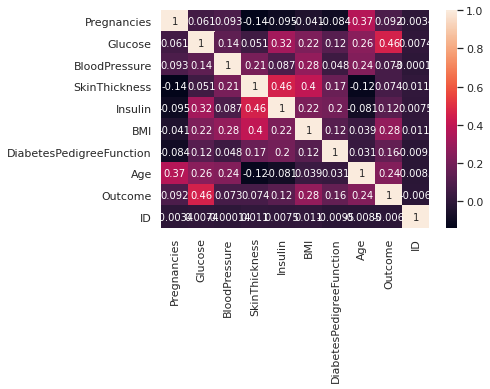

In [ ]:
corr_mat=newdf2.corr()
sns.heatmap(corr_mat,annot=True)
plt.show()

DROPPING UNIMPORTANT COLUMNS

In [ ]:
newdf3=newdf2.drop('ID',axis=1)
newdf3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,3,183,66.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
4763,2,75,64.0,24,55,29.7,0.370,33,0
4764,3,179,72.0,42,130,32.7,0.719,36,1
4765,6,85,78.0,0,0,31.2,0.382,42,0
4766,0,129,110.0,46,130,56.0,0.319,26,1


In [ ]:
#Split the dataframe into 'X' &'y'
X=newdf3.drop("Outcome",axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72.0,35,0,33.6,0.627,50
1,1,85,66.0,29,0,26.6,0.351,31
2,3,183,66.0,0,0,23.3,0.672,32
3,1,89,66.0,23,94,28.1,0.167,21
4,0,137,40.0,35,168,43.1,2.288,33


In [ ]:
y=newdf3['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

**TRAIN-TEST SPLIT**

In [ ]:
#splitting data into test and train

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train.shape

(3814, 8)

In [ ]:
X_test.shape

(954, 8)

PERFORMING FEATURE SCALING

In [ ]:
#Performing feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
scaler.fit_transform(df[['Age','Insulin']])

array([[ 1.43355141, -0.72069667],
       [-0.17953892, -0.72069667],
       [-0.09463943, -0.72069667],
       ...,
       [ 0.75435548, -0.72069667],
       [-0.60403638,  0.4502942 ],
       [-0.68893587, -0.03611739]])

**BUILDING THE MODEL**


1) K NEIGHBOURS CLASSIFIER (KNN)

In [ ]:
#fitting data to thhe model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of KNN Model is {knn_train_acc}")
print(f"Test Accuracy of KNN Model is {knn_test_acc}")

Training Accuracy of KNN Model is 0.9902988987939172
Test Accuracy of KNN Model is 0.9591194968553459


In [ ]:
#cross validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'

acc_knn = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_knn.mean()

0.966169902845914

In [ ]:
#model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score
y_pred_knn = knn.predict(X_test)
acc= accuracy_score(y_test, y_pred_knn)
prec = precision_score(y_test, y_pred_knn)
rec = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

results = pd.DataFrame([['KNN',acc, acc_knn.mean(),prec,rec, f1,]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score'])
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score
0,KNN,0.959119,0.96617,0.928358,0.953988,0.940998


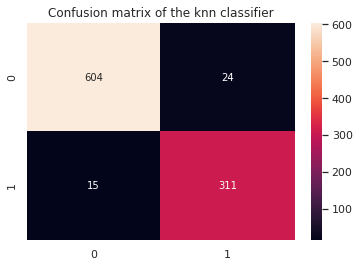

In [ ]:
#confusion matrix
cm_knn = confusion_matrix(y_test, y_pred)
plt.title('Confusion matrix of the knn classifier')
sns.heatmap(cm_knn,annot=True,fmt="d")
plt.show()

2)SVM-SUPPORT VECTOR MACHINE ALGORITHM

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of SVC Model is {svc_train_acc}")
print(f"Test Accuracy of SVC Model is {svc_test_acc}")

Training Accuracy of SVC Model is 0.8759832197168327
Test Accuracy of SVC Model is 0.8710691823899371


In [ ]:
#cross validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'

acc_svc = cross_val_score(estimator =svc, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_svc.mean()

0.8628636407360075

In [ ]:
#model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score
y_pred_svc = svc.predict(X_test)
acc= accuracy_score(y_test, y_pred_svc)

prec = precision_score(y_test, y_pred_svc)
rec = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)

results = pd.DataFrame([['SVC',acc, acc_knn.mean(),prec,rec, f1]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score'])
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score
0,SVC,0.871069,0.96617,0.848797,0.757669,0.800648


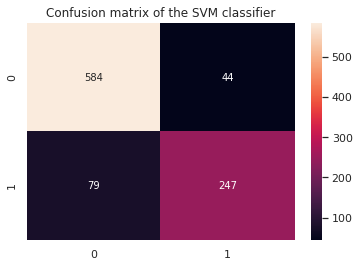

In [ ]:
#confusion matrix
cm_svc = confusion_matrix(y_test, y_pred)
plt.title('Confusion matrix of the SVM classifier')
sns.heatmap(cm_svc,annot=True,fmt="d")
plt.show()

3)RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'gini', max_depth = 3, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 100)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Random Forest Model is {rand_clf_train_acc}")
print(f"Test Accuracy of Random Forest Model is {rand_clf_test_acc}")

Training Accuracy of Random Forest Model is 0.7975878342947037
Test Accuracy of Random Forest Model is 0.7987421383647799


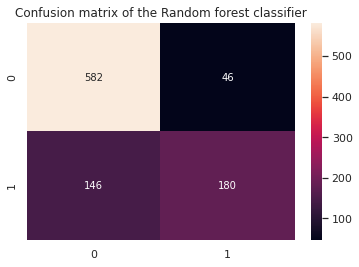

In [ ]:
#confusion matrix
cm_svc = confusion_matrix(y_test, y_pred)
plt.title('Confusion matrix of the Random forest classifier')
sns.heatmap(cm_svc,annot=True,fmt="d")
plt.show()

4)LOGISTIC REGRESSION

In [ ]:
# fitting data to model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

lr_train_acc = accuracy_score(y_train, lr.predict(X_train))
lr_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Logistic Regression Model is {lr_train_acc}")
print(f"Test Accuracy of Logistic Regression Model is {lr_test_acc}")

Training Accuracy of Logistic Regression Model is 0.7700576822233876
Test Accuracy of Logistic Regression Model is 0.7914046121593291


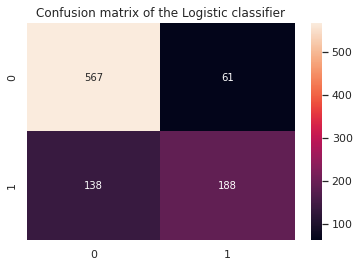

In [ ]:
#confusion matrix
cm_lr = confusion_matrix(y_test, y_pred)
plt.title('Confusion matrix of the Logistic classifier')
sns.heatmap(cm_lr,annot=True,fmt="d")
plt.show()

**COMPARING VARIOUS ML MODELS**

In [ ]:
#comparision among various ML models

models = ['KNN','SVC','Random Forest','Logistic classifier']
scores = [knn_test_acc, svc_test_acc, rand_clf_test_acc, lr_test_acc  ]

models = pd.DataFrame({'Model' : models, 'Score' : scores})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,KNN,0.959119
1,SVC,0.871069
2,Random Forest,0.798742
3,Logistic classifier,0.791405


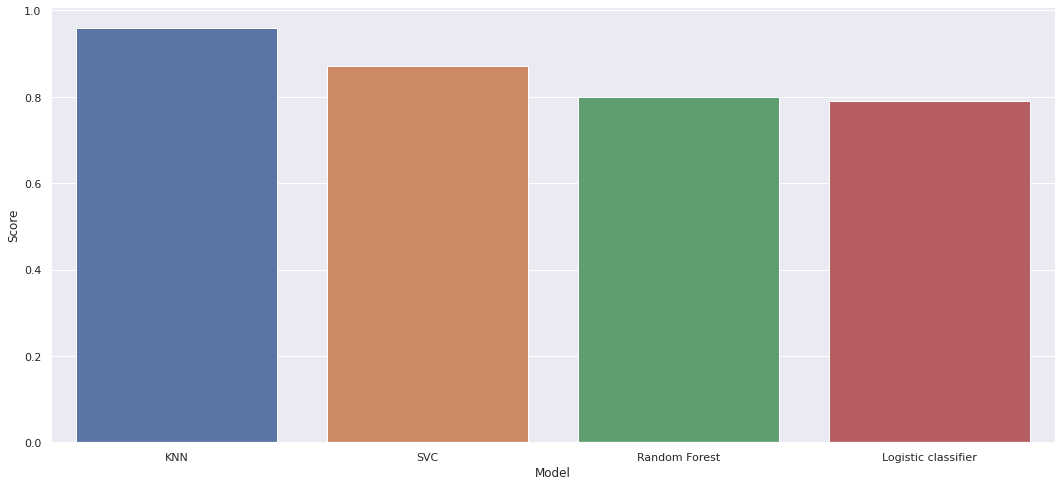

In [ ]:
plt.figure(figsize = (18, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.show()